<a href="https://colab.research.google.com/github/ryonce/Daily-Projects/blob/main/KNN_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [36]:
# Imports

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, \
ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [4]:
# Load the dataset

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data'

df = pd.read_csv(url, header=None)
df.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [23]:
# Rename columns
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight', 
              'Viscera_weight', 'Shell_weight', 'Rings'] 

In [24]:
# Is this a balanced data set?

df['Sex'].value_counts()

# Yes the data set is fairly balanced

M    1528
I    1342
F    1307
Name: Sex, dtype: int64

In [25]:
# Be sure to scale your data (try using the pipeline!)

X = df.drop(columns = 'Sex')
y = df['Sex']

In [10]:
# Train Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [27]:
# Make the pipeline

scaler = StandardScaler()
knn = KNeighborsClassifier()

knn_pipe = make_pipeline(scaler, knn)

# Fit data

knn_pipe.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('kneighborsclassifier', KNeighborsClassifier())])

In [30]:
# Predictions

train_preds = knn_pipe.predict(X_train)
test_preds = knn_pipe.predict(X_test)


# Calculate Classification Accuracy

train_score = knn_pipe.score(X_train, y_train)
test_score = knn_pipe.score(X_test, y_test)

print(f'The Accuracy Score is : {train_score}')
print(f'The Accuracy Score is : {test_score}')

The Accuracy Score is : 0.679757343550447
The Accuracy Score is : 0.5473684210526316


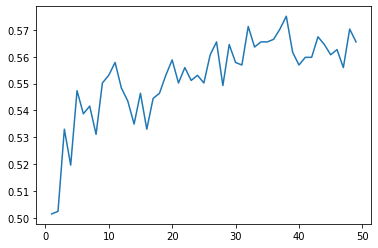

Best K value is 38 
with 0.5751196172248804 accuracy on the test set


In [31]:
krange = range(1, 50)
test_accuracies = []
bestacc = 0
bestk = 0
for k in krange:
  #find accuracy for each k
  pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
  pipe.fit(X_train, y_train)
  acc = accuracy_score(y_test, pipe.predict(X_test))
  #if accuracy for this k is better than previous accuracies, set bestk = k
  if acc > bestacc:
    bestacc = acc
    bestk = k

  test_accuracies.append(acc)

#plot accuracies over K
plt.plot(krange, test_accuracies, label='Test K Scores')
plt.show()

#print best k and best accuracy
print(f'Best K value is {bestk} \nwith {bestacc} accuracy on the test set')

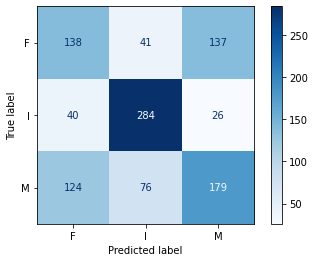

In [39]:
# create new model with best k

knn_final_pipe = make_pipeline(StandardScaler(), 
                               KNeighborsClassifier(n_neighbors = bestk))

knn_final_pipe.fit(X_train, y_train)

# Display confusion matrix for KNN with best k

ConfusionMatrixDisplay.from_estimator(knn_final_pipe, X_test, y_test, cmap = 'Blues', values_format = 'd');

 - The model shows the immature is highest predicting vs the female and male counter parts